In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import keras,os
import csv
from tensorflow.python.client import device_lib
import numpy as np
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16274917198118172594
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3665166336
locality {
  bus_id: 1
  links {
  }
}
incarnation: 423185489181857200
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [2]:
X=[]
Y=[]
x_train=[]
y_train=[]
x_test=[]
y_test=[]
with open('sorted_brain_orientation.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        ch="C:/Users/omarp/sonio-psc-brain/resized_images2/"+row[0]
        A=plt.imread(ch)
        X.append(A)
        Y.append(int(row[1]))
X=tf.keras.utils.normalize(X,axis=1)
n=len(X)
x_train=[X[i] for i in range(9*n//10) ]
y_train=[Y[i] for i in range(9*n//10) ]

x_test=[X[i] for i in range(9*n//10,n) ]
y_test=[Y[i] for i in range(9*n//10,n) ]
print(x_train[0].shape)
print(len(x_test))

(256, 256)
68


1
(610, 256, 256)
(610, 256, 256, 1)
(256, 256, 1)


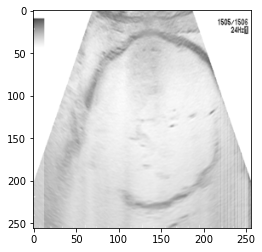

In [3]:
plt.imshow(x_train[0],cmap = plt.cm.binary)
print(y_train[0])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(x_train.shape)
print(x_train[0].shape)

In [4]:
trdata  = ImageDataGenerator(rotation_range=15,rescale=1.0/255.0,featurewise_center=True, featurewise_std_normalization=True)
traindata = trdata.flow_from_directory(directory="orientation/train",target_size=(224,224))
tsdata = ImageDataGenerator(rotation_range=15,rescale=1.0/255.0,featurewise_center=True, featurewise_std_normalization=True)
testdata = tsdata.flow_from_directory(directory="orientation/test", target_size=(224,224),batch_size =1)

Found 610 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False ## Not trainable weights

In [6]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(4096, activation='relu')
dense_layer_2 = layers.Dense(4096, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8194      
Total params: 134,268,738
Trainable params: 119,554,050
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(traindata, epochs=20, callbacks=[es])

C:\Users\omarp\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\omarp\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
20/20 [==============================] - 14s 357ms/step - loss: 5.7886 - accuracy: 0.5295
Epoch 2/20
20/20 [==============================] - 7s 364ms/step - loss: 0.5472 - accuracy: 0.7180
Epoch 3/20
20/20 [==============================] - 8s 368ms/step - loss: 0.2626 - accuracy: 0.9000
Epoch 4/20
20/20 [==============================] - 7s 359ms/step - loss: 0.6083 - accuracy: 0.8164
Epoch 5/20
20/20 [==============================] - 7s 352ms/step - loss: 0.4991 - accuracy: 0.7656
Epoch 6/20
20/20 [==============================] - 7s 358ms/step - loss: 0.2372 - accuracy: 0.9115
Epoch 7/20
20/20 [==============================] - 7s 360ms/step - loss: 0.1606 - accuracy: 0.9361
Epoch 8/20
20/20 [==============================] - 7s 344ms/step - loss: 0.1531 - accuracy: 0.9311
Epoch 9/20
20/20 [==============================] - 7s 363ms/step - loss: 0.0782 - accuracy: 0.9689
Epoch 10/20
20/20 [==============================] - 7s 353ms/step - loss: 0.1015 - accuracy: 0.963

In [9]:
loss, accur = model.evaluate(testdata)
print(loss,accur)

68/68 [==============================] - 1s 13ms/step - loss: 0.5954 - accuracy: 0.8824
0.5954470038414001 0.8823529481887817


In [10]:
if(accur>0.92):
    model.save("VGG16_transfer.model")

<class 'tuple'>
[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.11709582 0.11709582 0.11709582]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.28638247 0.28638247 0.28638247]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.4977349  0.4977349  0.4977349 ]
  [0.3341675  0.3341675  0.3341675 ]
  [0.34324518 0.34324518 0.34324518]]

 ...

 [[0.36308557 0.36308557 0.36308557]
  [0.362338   0.362338   0.362338  ]
  [0.37234536 0.37234536 0.37234536]
  ...
  [0.233803   0.233803   0.233803  ]
  [0.22734211 0.22734211 0.22734211]
  [0.2223423  0.2223423  0.2223423 ]]

 [[0.36745825 0.36745825 0.36745825]
  [0.3684728  0.36847

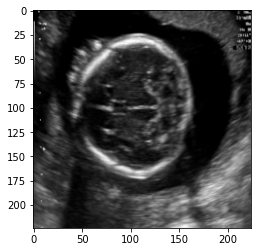

In [11]:
L=traindata.next()
print(type(L))
print(L[0][0])
plt.imshow(L[0][0])

In [5]:
model = tf.keras.models.load_model('VGG16_transfer_normalized_91.model')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        "resized_images3",
        target_size=(224, 224),
        shuffle = False,
        batch_size=1)
filenames = test_generator.filenames
nb_samples = len(filenames)



Found 0 images belonging to 0 classes.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8194      
Total params: 134,268,738
Trainable params: 119,554,050
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
from PIL import Image

In [11]:
src=os.getcwd()+"/resized_images3"
x_test=[]
for i in range(2949):
    A=Image.open(src+"/"+str(i)+".png")
    A=A.convert('RGB')
    A=np.array(A)
    x_test.append(A)
x_test=np.array(x_test)

In [12]:
print(x_test.shape)

(2949, 224, 224, 3)


In [13]:
prediction = model.predict(x_test)

In [14]:
print(prediction)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [19]:
file=open("results.txt",'w')
for i in range(len(x_test)):
    file.write(str(i)+","+str(np.argmax(prediction[i]))+"\n")

In [15]:
g=0
d=0
for i in range(len(prediction)):
    if np.argmax(prediction[i])==0:
        g+=1
    else:
        d+=1
print(d/(d+g))
print(g/(d+g))
print(d/g)

0.7917938284164123
0.20820617158358765
3.8029315960912053


In [16]:
g1=0
d1=0
with open('sorted_brain_orientation.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        if(row[0]=="2864.png"):
            break
        if(row[1]=="0"):
            g1+=1
        else:
            d1+=1
g=0
d=0
with open('sorted_brain_orientation.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        if(row[1]=="0"):
            g+=1
        else:
            d+=1
print(d/(d+g))
print(g/(d+g))
print(d/g)

d=d-d1
g=g-g1

print(d/(d+g))
print(g/(d+g))
print(d/g)

0.4631268436578171
0.5368731563421829
0.8626373626373627
0.5072463768115942
0.4927536231884058
1.0294117647058822


In [17]:
src=os.getcwd()+"/resized_images3"
x_test2=[]
for i in range(2864,2949):
    A=Image.open(src+"/"+str(i)+".png")
    A=A.convert('RGB')
    A=np.array(A)
    x_test2.append(A)
x_test2=np.array(x_test2)

In [18]:
new_predictions=model.predict(x_test2)

In [19]:
g=0
d=0
for i in range(len(x_test2)):
    if np.argmax(new_predictions[i])==0:
        g+=1
    else:
        d+=1
print(d/(d+g))
print(g/(d+g))
print(d/g)

0.7058823529411765
0.29411764705882354
2.4


In [36]:
loss, accur = model.evaluate(testdata)
print(loss,accur)

68/68 [==============================] - 1s 13ms/step - loss: 0.3669 - accuracy: 0.9265
0.3669181764125824 0.9264705777168274


In [13]:
for i in prediction:
    print(np.argmax(i))

1
1
1
0
1
1
1
1
0
1
1
1
0
0
1
1
0
1
1
0
1
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
0
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
0
0
0
0
0
0
1
1
1
0
0
1
0
0
1
1
1
0
1
1
1
1
1
1
1
0
0
0
0
0
0
1
0
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
